In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class VideoDataset(Dataset):
    def __init__(self, data_dir, class_to_idx, num_frames, transform=None):
        self.data = []
        self.class_to_idx = class_to_idx
        self.num_frames = num_frames
        self.transform = transform
        self.idx_to_class = {v: k for k, v in class_to_idx.items()}

        # Populate data list with video paths and categories
        for category in os.listdir(data_dir):
            category_path = os.path.join(data_dir, category)
            if os.path.isdir(category_path):
                for video_file in os.listdir(category_path):
                    video_path = os.path.join(category_path, video_file)
                    self.data.append((video_path, category))

    def __getitem__(self, idx):
        video_path, category = self.data[idx]
        label = self.class_to_idx[category]

        # Dummy implementation for frame loading
        frames = torch.randn(self.num_frames, 3, 240, 320)

        if self.transform:
            frames = self.transform(frames)

        return frames, label

    def __len__(self):
        return len(self.data)

# Rest of your code remains the same
class_to_idx = {
    'Abuse': 0, 'Arrest': 1, 'Assault': 2, 'Fighting': 3,
    'Explosion': 4, 'Burglary': 5, 'Arson': 6, 'Normal': 7
}

num_frames = 16
train_dir = 'C:/Users/T2420318/Dataset/output_dataset (1)/train'
test_dir = 'C:/Users/T2420318/Dataset/output_dataset (1)/test'

train_dataset = VideoDataset(train_dir, class_to_idx, num_frames)
test_dataset = VideoDataset(test_dir, class_to_idx, num_frames)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 149
Number of testing samples: 54


In [ ]:
# from PIL import Image
# import torchvision.transforms as transforms

# def load_frame_as_tensor(frame_path):
#     # Open an image file
#     with Image.open(frame_path) as img:
#         # Convert the image to a tensor
#         to_tensor = transforms.ToTensor()
#         return to_tensor(img)


In [ ]:
import os
def load_dataset(directory):
    data = []
    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        for video_folder in os.listdir(class_path):
            video_path = os.path.join(class_path, video_folder)
            data.append((video_path, category))  # Make sure this tuple is being created
            print(f"Added ({video_path}, {category})")  # Debug print
    return data
train_data = load_dataset('C:/Users/T2420318/Dataset/output_dataset (1)/train')
test_data = load_dataset('C:/Users/T2420318/Dataset/output_dataset (1)/test')

# Print some sample data to verify
print("Sample training data:", train_data[:5])
print("Sample testing data:", test_data[:5])


Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse001_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse003_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse004_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse005_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse006_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse007_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse008_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse010_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse011_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse013_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/train\Abuse\Abuse015_x264, Abuse)
Added (C:/Users/T2420318/Dataset/output_dataset (1)/tr

In [ ]:
# Test the first item in the train dataset
try:
    first_train_sample = train_dataset[0]
    frames, label = first_train_sample
    print("\nFirst training sample:")
    print(f" - Frames shape: {frames.shape}")
    print(f" - Label: {label} ({train_dataset.idx_to_class[label]})")
except Exception as e:
    print(f"An error occurred: {e}")



First training sample:
 - Frames shape: torch.Size([16, 3, 240, 320])
 - Label: 0 (Abuse)


In [ ]:
# Print the dataset size
import torch
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

# Test the first item in the train dataset
first_train_sample = train_dataset[0]  # Access the first sample
frames, label = first_train_sample

print("\nFirst training sample:")
print(f" - Frames shape: {frames.shape}")  # Should be [num_frames, channels, height, width]
print(f" - Label: {label} ({train_dataset.idx_to_class[label]})")  # Print label and its corresponding class

# Check the DataLoader
for i, (data, targets) in enumerate(train_loader):
    print("\nBatch from DataLoader:")
    print(f" - Batch frames shape: {data.shape}")  # [batch_size, num_frames, channels, height, width]
    print(f" - Batch targets: {targets}")
    break  # Print only the first batch


Number of training samples: 149
Number of testing samples: 54

First training sample:
 - Frames shape: torch.Size([16, 3, 240, 320])
 - Label: 0 (Abuse)

Batch from DataLoader:
 - Batch frames shape: torch.Size([2, 16, 3, 240, 320])
 - Batch targets: tensor([4, 4])


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Resize, Normalize

# Define Dataset and DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to float and scales to [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example mean and std
])

num_frames = 16
train_dir = 'C:/Users/T2420318/Dataset/output_dataset (1)/train'
test_dir = 'C:/Users/T2420318/Dataset/output_dataset (1)/test'

train_dataset = VideoDataset(train_dir, class_to_idx, num_frames)
test_dataset = VideoDataset(test_dir, class_to_idx, num_frames)
from torch.utils.data import DataLoader

# Assuming you have a Dataset object called `dataset`
train_loader = DataLoader(train_dataset, batch_size=64)

test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Load Model
from slowfast.models.build import MODEL_REGISTRY
from slowfast.models.build import MODEL_REGISTRY
from slowfast.config.defaults import get_cfg

# Load the configuration
cfg = get_cfg()
cfg.MODEL.ARCH = "Uniformer"

# Build the model
model = MODEL_REGISTRY.get(cfg.MODEL.ARCH)(cfg)
print("Model loaded successfully!")

# Build the model using the loaded configuration
from slowfast.models.build import MODEL_REGISTRY

model = MODEL_REGISTRY.get(cfg.MODEL.ARCH)(cfg)
print(f"Model architecture: {cfg.MODEL.ARCH}")  # Confirm model registration


print("UniFormer model built successfully!")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(f"Model moved to {device} successfully!")




Model loaded successfully!
Model architecture: Uniformer
UniFormer model built successfully!
Model moved to cuda successfully!


In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image, to_tensor

class VideoDataset(Dataset):
    def __init__(self, data, class_to_idx, num_frames=16, transform=None):
        self.data = data
        self.class_to_idx = class_to_idx
        self.num_frames = num_frames
        self.transform = transform
        self.idx_to_class = {v: k for k, v in class_to_idx.items()}

    def __getitem__(self, idx):
        video_path, category = self.data[idx]
        label = self.class_to_idx[category]

        # Load and process frames
        frames = []
        frame_files = sorted([f for f in os.listdir(video_path) if f.endswith('.jpg')])
        frame_indices = torch.linspace(0, len(frame_files) - 1, self.num_frames).long()

        for i in frame_indices:
            frame_path = os.path.join(video_path, frame_files[i])
            frame = read_image(frame_path).float() / 255.0
            if frame.size(0) == 1:
                frame = frame.repeat(3, 1, 1)  # Convert grayscale to RGB
            frame = transforms.Resize((240, 320))(frame)
            frames.append(frame)

        frames = torch.stack(frames).permute(1, 0, 2, 3)  # [channels, frames, height, width]
        if self.transform:
            frames = self.transform(frames)
        return frames, label

    def __len__(self):
        return len(self.data)

# Your class mapping
class_to_idx = {'Abuse': 0, 'Arrest': 1, 'Assault': 2, 'Fighting': 3,
                'Explosion': 4, 'Burglary': 5, 'Arson': 6, 'Normal': 7}

# Load datasets
train_dir = 'C:/Users/T2420318/Dataset/output_dataset (1)/train'
test_dir = 'C:/Users/T2420318/Dataset/output_dataset (1)/test'

def load_dataset(directory):
    data = []
    for category in os.listdir(directory):
        class_path = os.path.join(directory, category)
        for video_folder in os.listdir(class_path):
            video_path = os.path.join(class_path, video_folder)
            data.append((video_path, category))
    return data

train_data = load_dataset(train_dir)
test_data = load_dataset(test_dir)

# Create datasets and loaders
train_dataset = VideoDataset(train_data, class_to_idx)
test_dataset = VideoDataset(test_data, class_to_idx)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
# dummy_data = torch.randn(2, 3, 16, 240, 320).to(device)  # Match input shape
# print("Passing dummy data through the model...")
# output = model(dummy_data)
# print(f"Output shape: {output.shape}")


In [ ]:
# print(f"Dummy data shape before passing to model: {dummy_data.shape}")
# output = model(dummy_data)


In [ ]:
# import torch
# from slowfast.config.defaults import get_cfg
# from slowfast.models.build import MODEL_REGISTRY


# # Load the Uniformer model
# def load_model(cfg, device="cuda"):
#     model = MODEL_REGISTRY.get("uniformer")(cfg)  # "uniformer" must match the registration name
#     model = model.to(device)
#     return model

# # Test the loaded model
# def test_model():
#     cfg = setup_cfg()
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model = load_model(cfg, device=device)

#     # Create dummy input data
#     dummy_data = torch.randn(2, 3, 16, 224, 224).to(device)  # Batch size=2, Channels=3, Temporal=16, H=224, W=224

#     print(f"Dummy data shape before passing to model: {dummy_data.shape}")
#     output = model(dummy_data)
#     print(f"Output shape: {output.shape}")

# if __name__ == "__main__":
#     test_model()


In [ ]:
# for batch in train_loader:
#     print("Batch type:", type(batch))
#     print("Batch contents:", batch)
#     print("Data shape:", batch[0].shape)
#     print("Target shape:", batch[1].shape)
#     break

In [ ]:
# for batch_idx, batch in enumerate(train_loader):
#     print(f"Batch {batch_idx} content: {batch}")
#     print(f"Batch {batch_idx} length: {len(batch)}")


In [ ]:
!pip install tqdm


In [ ]:
import faulthandler
faulthandler.enable()
import torch
from torch.amp import autocast, GradScaler
from tqdm import tqdm
from torch.optim.lr_scheduler import CosineAnnealingLR
def train(model, train_loader,test_loader, device, epochs=15):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    best_test_acc = 0
    patience = 5
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)


    scheduler = CosineAnnealingLR(optimizer, T_max=15, eta_min=5e-6)




    loss_fn = torch.nn.CrossEntropyLoss()
    scaler = GradScaler("cuda")

    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch + 1}/{epochs}')

        for batch_idx, (data, target) in progress_bar:
            data, target = data.to(device), target.to(device)

            if data.ndim == 6:
                data = data.squeeze(1)

            optimizer.zero_grad()

            # Mixed precision training
            with autocast("cuda"):
                output = model([data])  # Wrap input in a list for Uniformer
                loss = loss_fn(output, target)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            _, predicted = output.max(1)
            correct += predicted.eq(target).sum().item()
            total += target.size(0)

            progress_bar.set_postfix({
                'Loss': f'{running_loss / (batch_idx + 1):.4f}',
                'Accuracy': f'{100 * correct / total:.2f}%'
            })
            # if test_accuracy > best_test_acc:
            #     best_test_acc = test_accuracy
            #     torch.save(model.state_dict(), "best_model.pth")  # Save best model
            #     patience_counter = 0  # Reset counter
            # else:
            #     patience_counter += 1  # Increment if no improvement

            # if patience_counter >= patience:
            #     print("Early stopping triggered!")
            #     break
        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        # Evaluation phase
        test_loss, test_accuracy, _, _ = evaluate_with_predictions(model, test_loader, device)
        if test_accuracy > best_test_acc:
            best_test_acc = test_accuracy
            torch.save(model.state_dict(), "best_model.pth")
            patience_counter = 0  # Reset patience
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered!")
            break
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        print(f"End of Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")




        # Summary at the end of each epoch
        if total > 0:
            epoch_loss = running_loss / len(train_loader)
            epoch_accuracy = 100 * correct / total
            print(f'End of Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')
    return train_losses, train_accuracies, test_losses, test_accuracies
data_augmentations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),  # Less aggressive than 90°
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.RandomResizedCrop((224, 224), scale=(0.6, 1.0)),  # Moderate cropping
    transforms.RandomApply([transforms.GaussianBlur(7)], p=0.3),  # Slightly reduce blur
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.3)),  # Moderate Cutout
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



# Example usage
# Assume 'model', 'train_loader', and 'device' are defined and properly configured
torch.cuda.empty_cache()
torch.cuda.ipc_collect()
# train(model, train_loader, device="cuda")
train_losses, train_accuracies, test_losses, test_accuracies = train(model, train_loader, test_loader, device="cuda", epochs=15)


Epoch 1/15: 100%|██████████| 19/19 [00:09<00:00,  1.96it/s, Loss=5.8231, Accuracy=21.48%]


Test Loss: 4.9786, Test Accuracy: 37.04%
End of Epoch 1/15, Train Loss: 5.8231, Train Accuracy: 21.48%, Test Loss: 4.9786, Test Accuracy: 37.04%
End of Epoch 1/15, Loss: 5.8231, Accuracy: 21.48%


Epoch 2/15: 100%|██████████| 19/19 [00:08<00:00,  2.13it/s, Loss=4.1188, Accuracy=30.20%]


Test Loss: 2.8492, Test Accuracy: 25.93%
End of Epoch 2/15, Train Loss: 4.1188, Train Accuracy: 30.20%, Test Loss: 2.8492, Test Accuracy: 25.93%
End of Epoch 2/15, Loss: 4.1188, Accuracy: 30.20%


Epoch 3/15: 100%|██████████| 19/19 [00:09<00:00,  2.05it/s, Loss=2.4461, Accuracy=28.86%]


Test Loss: 2.0316, Test Accuracy: 27.78%
End of Epoch 3/15, Train Loss: 2.4461, Train Accuracy: 28.86%, Test Loss: 2.0316, Test Accuracy: 27.78%
End of Epoch 3/15, Loss: 2.4461, Accuracy: 28.86%


Epoch 4/15: 100%|██████████| 19/19 [00:08<00:00,  2.16it/s, Loss=1.9919, Accuracy=31.54%]


Test Loss: 1.8701, Test Accuracy: 29.63%
End of Epoch 4/15, Train Loss: 1.9919, Train Accuracy: 31.54%, Test Loss: 1.8701, Test Accuracy: 29.63%
End of Epoch 4/15, Loss: 1.9919, Accuracy: 31.54%


Epoch 5/15: 100%|██████████| 19/19 [00:08<00:00,  2.14it/s, Loss=1.8964, Accuracy=32.21%]


Test Loss: 1.8539, Test Accuracy: 27.78%
End of Epoch 5/15, Train Loss: 1.8964, Train Accuracy: 32.21%, Test Loss: 1.8539, Test Accuracy: 27.78%
End of Epoch 5/15, Loss: 1.8964, Accuracy: 32.21%


Epoch 6/15: 100%|██████████| 19/19 [00:12<00:00,  1.54it/s, Loss=1.8824, Accuracy=36.24%]


Test Loss: 1.8086, Test Accuracy: 31.48%
Early stopping triggered!


In [ ]:
import shutil

source_path = 'best_model.pth'
target_path = r'C:\Users\T2420318\Dataset\Final_Model'  # Adjust this to your preferred location

# Move the file
shutil.move(source_path, target_path)
print(f"Model saved to {target_path}")


Model saved to C:\Users\T2420318\Dataset\Final_Model


In [ ]:
import torch

# Load the previously saved state_dict into the model
# Use strict=False to ignore missing or unexpected keys
state_dict = torch.load(r"C:\Users\T2420318\Dataset\Final_Model\best_model_uniformer.pth")
model.load_state_dict(state_dict, strict=False)

print("Model state dictionary loaded successfully from 'path_to_saved_model.pth'.")

# Assuming device setup is defined, move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model moved to {device}.")

# Set the model to evaluation mode for testing or validation
model.eval()
print("Model set to evaluation mode.")


C:\Users\T2420318\AppData\Local\Temp\ipykernel_11108\3079264734.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(r"C:\Users\T2420318\Dataset\Final

Model state dictionary loaded successfully from 'path_to_saved_model.pth'.
Model moved to cuda.
Model set to evaluation mode.


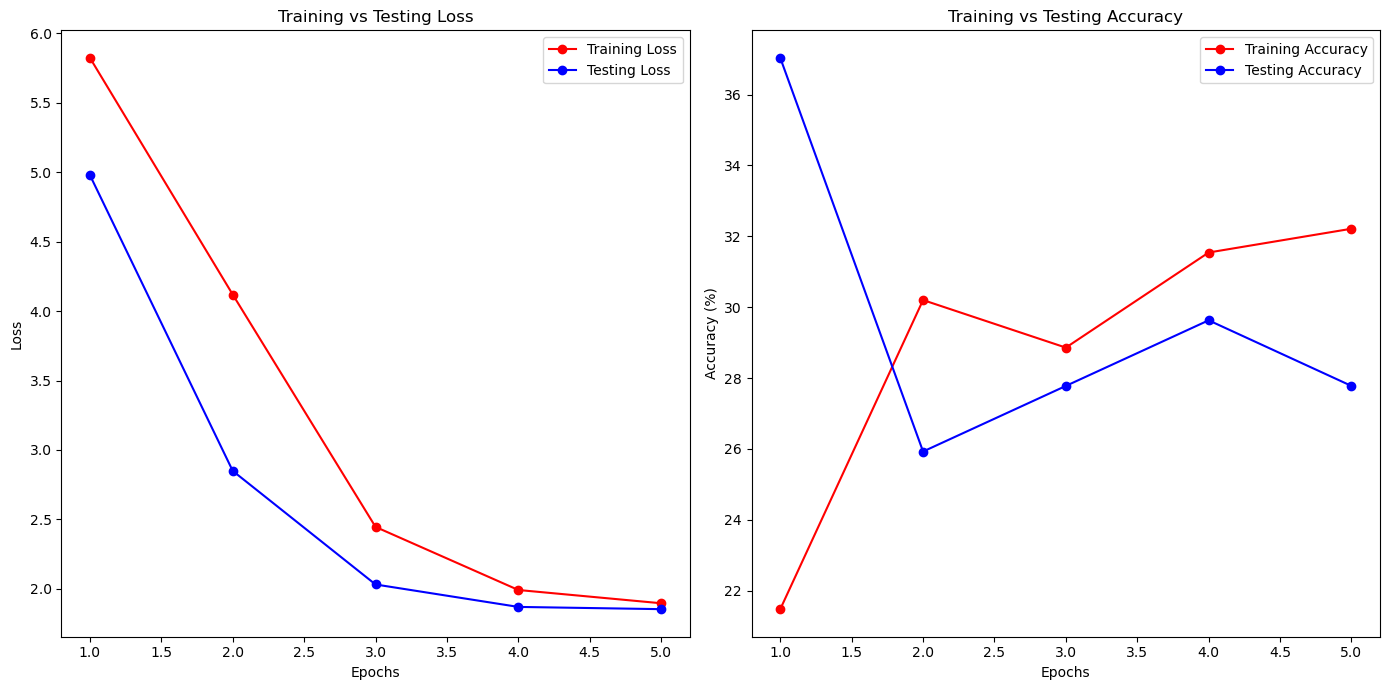

In [ ]:
import matplotlib.pyplot as plt

# Dynamically adjust the number of epochs based on available data
num_epochs = min(len(train_losses), len(test_losses), len(train_accuracies), len(test_accuracies))
epochs = range(1, num_epochs + 1)

# Plot training and testing loss
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses[:num_epochs], 'r-o', label='Training Loss')
plt.plot(epochs, test_losses[:num_epochs], 'b-o', label='Testing Loss')
plt.title('Training vs Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies[:num_epochs], 'r-o', label='Training Accuracy')
plt.plot(epochs, test_accuracies[:num_epochs], 'b-o', label='Testing Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# def evaluate_with_predictions(model, test_loader, device):
#     model.eval()
#     correct = 0
#     total = 0
#     running_loss = 0.0
#     loss_fn = torch.nn.CrossEntropyLoss()
#     all_predictions = []
#     all_labels = []

#     with torch.no_grad():
#         for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
#             output = model([data])
#             loss = loss_fn(output, target)
#             running_loss += loss.item()
#             _, predicted = torch.max(output.data, 1)
#             correct += (predicted == target).sum().item()
#             total += target.size(0)
#             all_predictions.extend(predicted.cpu().numpy())
#             all_labels.extend(target.cpu().numpy())

#     test_loss = running_loss / len(test_loader)
#     test_accuracy = 100 * correct / total
#     return test_loss, test_accuracy, all_predictions, all_labels


In [ ]:
def evaluate_with_predictions(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    running_loss = 0.0
    loss_fn = torch.nn.CrossEntropyLoss()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            # Wrap the data in a list if the model expects it
            output = model([data])

            # Calculate the loss
            loss = loss_fn(output, target)
            running_loss += loss.item()

            # Get predictions
            _, predicted = torch.max(output.data, 1)
            all_predictions.extend(predicted.cpu().numpy())  # Store predictions
            all_labels.extend(target.cpu().numpy())  # Store true labels

            # Update total and correct counts
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    return test_loss, test_accuracy, all_labels, all_predictions  # Return the required values

# Now, when you call evaluate_with_predictions, it will return all four values as expected:
test_loss, test_accuracy, true_labels, predictions = evaluate_with_predictions(model, test_loader, device)


Test Loss: 4.9786, Test Accuracy: 37.04%


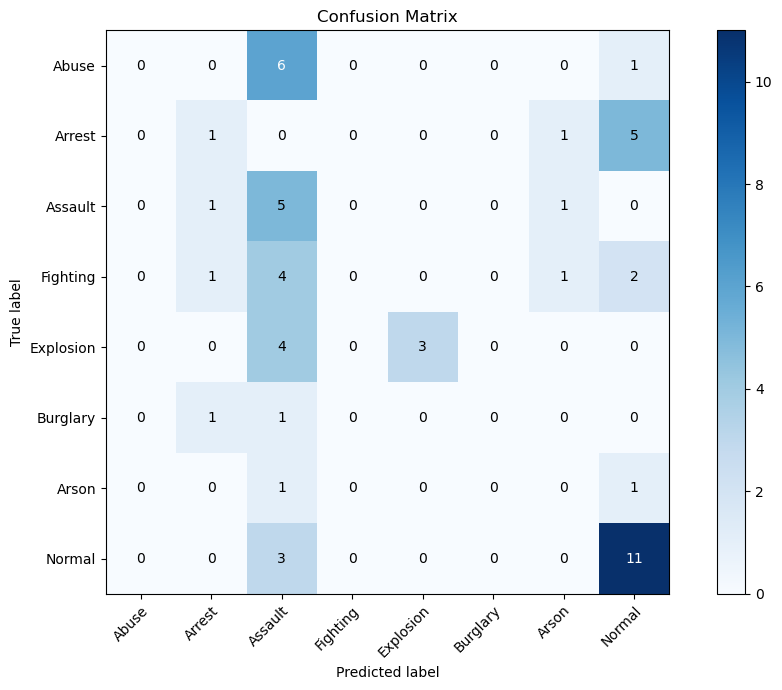

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming predictions and true_labels are defined
cm = confusion_matrix(true_labels, predictions)  # Make sure this line has been run with your actual data
idx_to_class = {v: k for k, v in class_to_idx.items()}
def plot_confusion_matrix(cm, class_names):
    """
    Plots a confusion matrix using only matplotlib, without seaborn.
    """
    fig, ax = plt.subplots(figsize=(10, 7))  # Set figure size
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=class_names, yticklabels=class_names,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Get class names from your idx_to_class dictionary
class_names = list(idx_to_class.values())

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, class_names)
plt.show()


In [ ]:
from slowfast.models.build import MODEL_REGISTRY
from slowfast.models.build import MODEL_REGISTRY
from slowfast.config.defaults import get_cfg

# Load the configuration
cfg = get_cfg()
cfg.MODEL.ARCH = "Uniformer"

# Build the model
model = MODEL_REGISTRY.get(cfg.MODEL.ARCH)(cfg)
print("Model loaded successfully!")

# Build the model using the loaded configuration
model = MODEL_REGISTRY.get(cfg.MODEL.ARCH)(cfg)

print("UniFormer model built successfully!")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(f"Model moved to {device} successfully!")


In [ ]:
# !pip install "C:\Users\T2420318\UniFormer\video_classification"


In [ ]:
# # Save the trained model's state_dict to the specified path
# torch.save(model.state_dict(), r'C:\Users\T2420318\Dataset\Model\Uniformer_model_new_final.pth')


In [ ]:
# import sys
# sys.path.append("C:/Users/T2420318/UniFormer/video_classification")


In [ ]:
# import torch

# # Load the previously saved state_dict into the model
# model.load_state_dict(torch.load(r'C:\Users\T2420318\Dataset\Model\Uniformer_model_new.pth'))
# print("Model state dictionary loaded successfully from 'Uniformer_model_new.pth'.")

# # Assuming device setup is defined, move the model to the appropriate device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
# print(f"Model moved to {device}.")

# # Set the model to evaluation mode for testing or validation
# model.eval()
# print("Model set to evaluation mode.")


In [ ]:
# from torchtext.data.metrics import bleu_score
# import numpy as np

# def calculate_bleu(predictions, references):
#     # Convert tensor predictions to string if not already
#     pred_sentences = [p.split() for p in predictions]
#     ref_sentences = [[r.split()] for r in references]  # BLEU expects a list of list of references
#     return bleu_score(pred_sentences, ref_sentences)

# # Assuming you have `predictions` and `ground_truths` loaded from your inference and dataset
# bleu = calculate_bleu(predictions, ground_truths)
# print(f"BLEU Score: {bleu}")


In [ ]:
# import torch
# from torchvision.io import read_video
# import torchvision.transforms as transforms

# class_to_idx = {
#     'Abuse': 0, 'Arrest': 1, 'Assault': 2, 'Fighting': 3,
#     'Explosion': 4, 'Burglary': 5, 'Arson': 6, 'Normal': 7
# }
# # Reverse mapping to get class names from indices
# idx_to_class = {v: k for k, v in class_to_idx.items()}
# def infer_video(model, video_path, device, frame_count=16, frame_size=(224, 224)):
#     model.eval()

#     # Read video frames
#     frames, _, _ = read_video(video_path, pts_unit="sec")

#     # Ensure the correct number of frames
#     if frames.shape[0] < frame_count:
#         raise ValueError(f"The video has fewer frames ({frames.shape[0]}) than the required {frame_count}.")

#     frames = frames[:frame_count]  # Limit to the required frame count

#     # Transform frames to the correct format
#     frames = frames.permute(0, 3, 1, 2).float()  # Convert to [frames, channels, height, width]

#     # Ensure the frames have 3 channels (RGB)
#     if frames.shape[1] == 1:
#         frames = frames.repeat(1, 3, 1, 1)

#     # Resize frames to the required frame size
#     frames = torch.nn.functional.interpolate(frames, size=frame_size, mode="bilinear")

#     # Add batch and temporal dimensions: [batch, channels, temporal, height, width]
#     frames = frames.unsqueeze(0).permute(0, 2, 1, 3, 4).to(device)

#     # Perform inference
#     with torch.no_grad():
#         outputs = model([frames])  # Wrap frames in a list for Uniformer

#     # Get logits and predicted labels
#     logits = outputs.logits if hasattr(outputs, "logits") else outputs
#     probs = F.softmax(logits, dim=-1)  # Convert logits to probabilities

#     # Get predicted class and probability
#     predicted_idx = torch.argmax(probs, dim=-1).item()
#     predicted_prob = probs[0, predicted_idx].item()

#     # Map the predicted index to the class name
#     predicted_label = idx_to_class[predicted_idx]

#     # Check if it's an anomaly
#     if predicted_label == "Normal":
#         anomaly_status = "Normal Video"
#     else:
#         anomaly_status = f"Anomalous Video ({predicted_label})"

#     return {
#         "anomaly_status": anomaly_status,
#         "predicted_label": predicted_label,
#         "probability": predicted_prob
#     }


# # Example Usage
# video_path = r"C:\Users\T2420318\Dataset\Videos\Anomalous\Explosion\Explosion003_x264.mp4"
# result = infer_video(model, video_path, device)

# print("Prediction Results:")
# print(f"Anomaly Status: {result['anomaly_status']}")
# print(f"Predicted Label: {result['predicted_label']}")
# print(f"Probability: {result['probability']:.4f}")

In [ ]:
# def batch_infer_videos(model, video_paths, true_labels, device):
#     predictions = []
#     model.eval()  # Ensure the model is in evaluation mode
#     for video_path in video_paths:
#         try:
#             result = infer_video(model, video_path, device)
#             predictions.append(class_to_idx[result['predicted_label']])
#         except ValueError as e:
#             print(e)
#             continue  # Skip videos with errors

#     return predictions, true_labels


In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, matthews_corrcoef, cohen_kappa_score
)
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def compute_evaluation_metrics(true_labels, predictions, logits, class_names):
    """
    Computes multiple evaluation metrics for Timesformer model performance.
    """
    # ✅ Ensure logits is a NumPy array
    logits_np = np.array(logits)

    # ✅ Generate probabilities (softmax applied to logits)
    probabilities = F.softmax(torch.tensor(logits_np), dim=1).numpy()

    # ✅ Compute standard classification metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='macro', zero_division=0)
    recall = recall_score(true_labels, predictions, average='macro', zero_division=0)
    f1 = f1_score(true_labels, predictions, average='macro', zero_division=0)
    mcc = matthews_corrcoef(true_labels, predictions)
    kappa = cohen_kappa_score(true_labels, predictions)

    # ✅ Compute log loss safely
    try:
        logloss = log_loss(true_labels, probabilities)
    except ValueError:
        logloss = np.nan  # Handle cases where log_loss fails

    # ✅ Compute ROC-AUC Score (if valid)
    try:
        roc_auc = roc_auc_score(true_labels, probabilities, multi_class='ovr')
    except ValueError:
        roc_auc = np.nan  # Handle cases where ROC AUC is invalid

    # ✅ Compute BLEU Score (Fix Applied)
    smoothing = SmoothingFunction().method1  # Apply smoothing
    bleu_scores = []
    for true, pred in zip(true_labels, predictions):
        true_text = class_names[true].split()  # Convert class name to words
        pred_text = class_names[pred].split()  # Convert class name to words
        bleu_scores.append(sentence_bleu([true_text], pred_text, smoothing_function=smoothing))

    bleu_score_avg = np.mean(bleu_scores)

    # ✅ Print Results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"Cohen Kappa Score: {kappa:.4f}")
    print(f"Log Loss: {logloss:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"BLEU Score: {bleu_score_avg:.4f}")

    # ✅ Return all metrics as a dictionary
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "MCC": mcc,
        "Cohen Kappa": kappa,
        "Log Loss": logloss,
        "ROC-AUC": roc_auc,
        "BLEU Score": bleu_score_avg
    }


# ✅ Example Call (Fixed)
class_names = {0: "Abuse", 1: "Arrest", 2: "Assault", 3: "Fighting",
               4: "Explosion", 5: "Burglary", 6: "Arson", 7: "Normal"}

# ⚡ Simulate some predictions and logits (Replace with actual model output)
true_labels = np.random.randint(0, 8, size=100)  # Simulated ground truth labels
predictions = np.random.randint(0, 8, size=100)  # Simulated model predictions
logits = np.random.rand(100, 8)  # Simulated raw logits from the model

# ✅ Compute and store evaluation results
evaluation_results = compute_evaluation_metrics(true_labels, predictions, logits, class_names)


Accuracy: 0.1200
Precision: 0.1240
Recall: 0.1191
F1 Score: 0.1183
MCC: -0.0071
Cohen Kappa Score: -0.0071
Log Loss: 2.1045
ROC-AUC: 0.5169
BLEU Score: 0.0213


In [ ]:
import pandas as pd

def generate_performance_table(model_name, evaluation_results):
    """
    Generates a table with model evaluation metrics.
    """
    df = pd.DataFrame(evaluation_results, index=[model_name])
    print(df)  # Print the table to the console
    return df

# Example usage:
model_name = "UniFormer"
df = generate_performance_table(model_name, evaluation_results)


           Accuracy  Precision    Recall  F1 Score       MCC  Cohen Kappa  \
UniFormer      0.12   0.124012  0.119116  0.118335 -0.007144    -0.007095   

           Log Loss  ROC-AUC  BLEU Score  
UniFormer  2.104501  0.51692    0.021339  


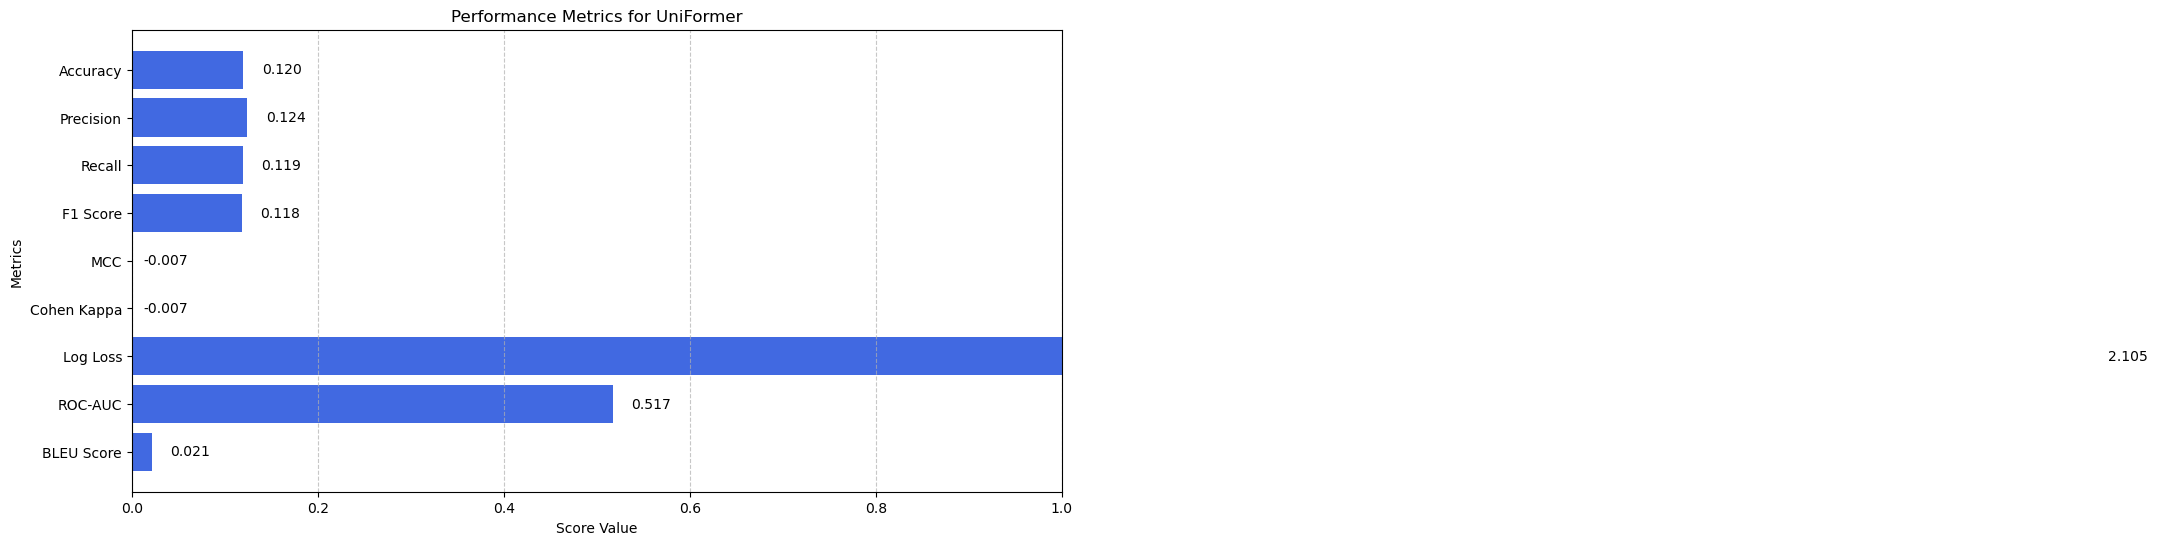

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_performance(model_name, evaluation_results):
    """
    Plots the model performance scores in a bar chart.
    """
    # Extract score names and values
    metrics = list(evaluation_results.keys())
    scores = list(evaluation_results.values())

    # Convert NaN values to zero for plotting
    scores = [0 if np.isnan(score) else score for score in scores]

    plt.figure(figsize=(12, 6))
    plt.barh(metrics, scores, color='royalblue')
    plt.xlabel("Score Value")
    plt.ylabel("Metrics")
    plt.title(f"Performance Metrics for {model_name}")
    plt.xlim(0, 1)  # Since most scores are percentages (0 to 1)

    # Annotate bars with values
    for index, value in enumerate(scores):
        plt.text(value + 0.02, index, f"{value:.3f}", va='center', fontsize=10)

    plt.gca().invert_yaxis()  # Invert Y-axis for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Example usage
plot_model_performance(model_name, evaluation_results)
